# Desafio módulo 1 - Plano saúde
<hr>

### **Enunciado**

Uma operadora de seguro de saúde identificou, na sua base de dados de clientes, a relação entre os dados de colesterol e peso com a incidência de problemas que influenciam no desenvolvimento de doenças cardíacas. Pensando no bem-estar dos seus clientes, e ao mesmo tempo pensando em diminuir problemas de internação e tratamento para esses tipos de causa, a operadora quer realizar um estudo para identificar o perfil de pessoas que se encaixam nos grupos de risco e assim realizar medidas preventivas e palestras de cuidados médicos. Para isso, a operadora conta com a equipe de arquiteto de big data para ajudá-los a encontrar o grupo de risco dentre
essas pessoas.Através da análise dos dados, os analistas da operadora de seguro de saúde identificaram 4 grandes grupos:

1. Alto Risco;
2. Risco Moderado alto;
3. Risco Moderado baixo;
4. Baixo Risco.

**Atividades**

1. Criar um projeto no Google Drive;
2. Coletar e analisar os dados dos seguintes datasets:

  a. dados_clientes;

  b. estados_brasileiros;

  c. idade_clientes.
  
3. Manipular dados e corrigir erros, se necessário;
4. Implementar algoritmo não supervisionado kmeans;
5. Criar agrupamento para quatro grupos distintos;
6. Responder às questões teóricas e práticas do trabalho.

## Importando Bibliotecas

In [164]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Coleta de dados

### Coletando os dados de clientes

In [86]:
clientes = pd.read_excel("dados_clientes-1.xlsx")
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


### Coletando dados de estados brasileiros

In [87]:
estados = pd.read_csv('estados_brasileiros-1.csv', sep=';', encoding='latin-1')
estados.head()

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil


### Coletando idade de clientes

In [88]:
idade = pd.read_csv('idade_clientes-1.csv', sep=';')
idade

,id_cliente,idade
0,1,17
1,2,28
2,3,62
3,4,55
4,5,44
...,...,...
542,543,20
543,544,66
544,545,36
545,546,57


## Preparando dados

### Analisando as variaveis do banco

In [89]:
# analisando dados de clientes
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [90]:
# dados estatisticos de clientes
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [91]:
# analisando dados de estados
estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id_estado     27 non-null     int64 
 1   estado        27 non-null     object
 2   sigla_estado  27 non-null     object
 3   pais          25 non-null     object
dtypes: int64(1), object(3)
memory usage: 992.0+ bytes


In [92]:
# dados estatisticos de estados
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [93]:
# analisando dados de idades
idade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   id_cliente  547 non-null    int64
 1   idade       547 non-null    int64
dtypes: int64(2)
memory usage: 8.7 KB


In [94]:
# dados estatisticos de idade
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


### Analisando valores ausentes na base

In [95]:
# base clientes
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [96]:
# base estados
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [97]:
# base idade
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

Checklist:

1. Clientes: 5 valores da coluna ausentes
2. Estados: 2 valores da coluna pais ausentes
3. Idade: OK, não tem nenhum valor ausente

Total: 7 registros ausentes

In [98]:
# olhando os valores ausentes de cliente 
clientes.loc[clientes['peso'].isnull()]

,id_cliente,peso,colesterol,genero,id_estado
63,64,NaN,211,Masculino,12
101,102,NaN,230,Feminino,24
146,147,NaN,171,Masculino,23
195,196,NaN,143,Feminino,15
215,216,NaN,180,Masculino,13


In [99]:
# olhando os valores ausentes de pais
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


### Eliminando registros da base clientes

In [100]:
# removendo registros da coluna peso
clientes.dropna(subset=['peso'], inplace=True)
clientes.head()

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26


In [101]:
# verificando novamente os valores ausentes
clientes.isna().sum()

id_cliente    0
peso          0
colesterol    0
genero        0
id_estado     0
dtype: int64

In [102]:
# contando os registros 
clientes.count()

id_cliente    542
peso          542
colesterol    542
genero        542
id_estado     542
dtype: int64

In [103]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,542.000000,542.000000,542.000000,542.000000
mean,275.190037,143.440959,170.280443,13.800738
std,158.194932,30.836868,39.185218,7.604659
min,1.000000,95.000000,102.000000,1.000000
25%,138.250000,116.000000,136.000000,7.000000
50%,276.500000,140.000000,169.000000,13.000000
75%,411.750000,171.000000,207.750000,20.000000
max,547.000000,203.000000,235.000000,27.000000


### Calculando media e mediana de peso clientes

In [104]:
media = clientes.peso.mean()
mediana = clientes.peso.median()

print(f"O valor da media dos pesos é: {media}\nO valor da mediana é: {mediana}")

O valor da media dos pesos é: 143.4409594095941
O valor da mediana é: 140.0


In [105]:
clientes.head(1)

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23


In [106]:
clientes.tail(1)

,id_cliente,peso,colesterol,genero,id_estado
546,547,148.0,176,Masculino,8


### Eliminando dados da base estados


In [107]:
estados.loc[estados['pais'].isnull()]

,id_estado,estado,sigla_estado,pais
17,18,Piauí,pi,NaN
23,24,Santa Catarina,sc,NaN


In [108]:
print(estados.pais.value_counts())

Brasil    25
Name: pais, dtype: int64


In [109]:
estados.dropna(subset=['pais'], inplace=True)
estados

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


In [110]:
# substituir valores vazios da coluna pais por brasil
#estados.pais.fillna('Brasil', inplace=True)

In [111]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            0
dtype: int64

### Analisando a distribuição

In [112]:
import plotly.express as px

fig = px.histogram(clientes, x="peso", nbins=100)
fig.show()

In [113]:
#criando histograma para colesterol
fig = px.histogram(clientes, x="colesterol", nbins=100)
fig.show()

### Juntando as bases de dados

In [114]:
estados[:7]

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil


In [115]:
clientes[:7]

,id_cliente,peso,colesterol,genero,id_estado
0,1,102.0,111,Masculino,23
1,2,115.0,135,Masculino,7
2,3,115.0,136,Masculino,4
3,4,140.0,167,Feminino,24
4,5,130.0,158,Masculino,26
5,6,198.0,227,Masculino,8
6,7,114.0,131,Masculino,26


In [116]:
# vai fazer um join entre as bases de dados
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil
17,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil
39,3,115.0,136,Masculino,4,Amazonas,am,Brasil
64,5,130.0,158,Masculino,26,Sergipe,se,Brasil
83,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil
...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,ro,Brasil
430,544,129.0,157,Masculino,1,Acre,ac,Brasil
155,545,107.0,115,Masculino,6,Ceará,ce,Brasil
372,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil


In [117]:
# realiza a junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [118]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,57


In [119]:
# resetando index
base_completa.reset_index(drop=True)

,id_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,Amazonas,am,Brasil,62
3,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44
4,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...
493,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,20
494,544,129.0,157,Masculino,1,Acre,ac,Brasil,66
495,545,107.0,115,Masculino,6,Ceará,ce,Brasil,36
496,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,57


### Organizando as bases de dados

In [120]:
# renomeando coluna
base_completa.rename(columns = {'id_cliente': 'cod_cliente'}, inplace=True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,rr,Brasil,17
17,2,115.0,135,Masculino,7,Distrito Federal,df,Brasil,28
39,3,115.0,136,Masculino,4,Amazonas,am,Brasil,62
64,5,130.0,158,Masculino,26,Sergipe,se,Brasil,44
83,6,198.0,227,Masculino,8,Espírito Santo,es,Brasil,17
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,ro,Brasil,20
430,544,129.0,157,Masculino,1,Acre,ac,Brasil,66
155,545,107.0,115,Masculino,6,Ceará,ce,Brasil,36
372,546,117.0,147,Masculino,20,Rio Grande do Norte,rn,Brasil,57


In [121]:
# alterar sigla estado para upercase
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17
...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57


In [122]:
# Alterando disposição das colunas e resetando index
base_completa[['cod_cliente', 'genero', 'idade', 'peso', 
               'id_estado', 'estado', 'sigla_estado', 'pais' ]].reset_index(drop=True)

,cod_cliente,genero,idade,peso,id_estado,estado,sigla_estado,pais
0,1,Masculino,17,102.0,23,Roraima,RR,Brasil
1,2,Masculino,28,115.0,7,Distrito Federal,DF,Brasil
2,3,Masculino,62,115.0,4,Amazonas,AM,Brasil
3,5,Masculino,44,130.0,26,Sergipe,SE,Brasil
4,6,Masculino,17,198.0,8,Espírito Santo,ES,Brasil
...,...,...,...,...,...,...,...,...
493,543,Masculino,20,172.0,22,Rondônia,RO,Brasil
494,544,Masculino,66,129.0,1,Acre,AC,Brasil
495,545,Masculino,36,107.0,6,Ceará,CE,Brasil
496,546,Masculino,57,117.0,20,Rio Grande do Norte,RN,Brasil


## Analise de dados

### Aplicando o método do cotovelo

In [123]:
# importando o sklearn
from sklearn.cluster import KMeans

In [124]:
# calcular a variação total de clusters
def calcular_wcss(dados_cliente):
  wcss=[]
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [125]:
# variaveis que serão utilizadas no agrupamento
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
17,115.0,135
39,115.0,136
64,130.0,158
83,198.0,227


In [126]:
# calculando o wcss
wcss_clientes = calcular_wcss(dados_cliente)

C:\Users\CRISTINA RAMOS\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.



In [127]:
type(wcss_clientes)

list

In [128]:
# observando os dados obtidos no wcss
for i in range (len(wcss_clientes)):
  print(f'O cluster {i} possui o valor de wcss de: {wcss_clientes[i]}')

O cluster 0 possui o valor de wcss de: 1248240.668674699
O cluster 1 possui o valor de wcss de: 298932.7377352369
O cluster 2 possui o valor de wcss de: 127847.6195681955
O cluster 3 possui o valor de wcss de: 73826.3353951529
O cluster 4 possui o valor de wcss de: 49079.083808467956
O cluster 5 possui o valor de wcss de: 34064.500021008374
O cluster 6 possui o valor de wcss de: 25122.257107188125
O cluster 7 possui o valor de wcss de: 20441.83167815419
O cluster 8 possui o valor de wcss de: 15949.21276427297
O cluster 9 possui o valor de wcss de: 13390.707825076835


### Visualizando o gráfico do cotovelo

In [129]:
# visualizado gráfico
import plotly.express as px
import plotly.graph_objects as go

grafico_wcss = px.line(x=range(1,11), y=wcss_clientes)

fig = go.Figure(grafico_wcss)

fig.update_layout(
    title='Calculando o WCSS', 
    xaxis_title='Número de clusters',
    yaxis_title='Valor do wcss',
    )

fig.show()

Número de clusters = 4


In [130]:
# fazendo o predict com a coluna resultado
kmeans_clientes = KMeans(n_clusters=4, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,2
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28,2
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62,2
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44,1
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17,0
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20,0
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66,1
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36,2
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57,1


### Calcular centroides de cada cluster

In [131]:
dados_cliente

,peso,colesterol
0,102.0,111
17,115.0,135
39,115.0,136
64,130.0,158
83,198.0,227
...,...,...
418,172.0,207
430,129.0,157
155,107.0,115
372,117.0,147


In [132]:
#calculando os centroides do cluster
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

### Visualizando o Gráfico

In [133]:
#grafico - dados
grafico = px.scatter(x=base_completa['peso'],
                     y=base_completa['colesterol'],
                     color=base_completa['cluster'])

#grafico - centroides
grafico_centroide = px.scatter(x=centroides_clusters[:,0],
                               y=centroides_clusters[:,1], size=[7,7,7,7]
                               )

grafico_final = go.Figure(data = grafico.data + grafico_centroide.data)

# alterando layout - nomes para titulo e eixo no x e y
grafico_final.update_layout(title='Analise de Clusters',
                  xaxis_title='Peso',
                  yaxis_title='Colesterol'
                  )

grafico_final.show()

In [134]:
# gráfico sem os centroides

grafico = px.scatter(x=base_completa['peso'],
                     y=base_completa['colesterol'],
                     color=base_completa['cluster'])

fig = go.Figure(grafico)

fig.update_layout(title='Analise de Clusters',
                  xaxis_title='Peso',
                  yaxis_title='Colesterol'
                  )
fig.show()

### Definindo uma função para gerar graficos

In [135]:
def plotar_grafico(x,y,xlabel,y_label):
  grafico = px.scatter(x=x,
                       y=y,
                       color=base_completa['cluster']
                       )
  fig = go.Figure(grafico)

  fig.update_layout(title='Análise de Clusters',
                    xaxis_title=xlabel,
                    yaxis_title=y_label
                    )
  fig.show()

In [136]:
# peso x colesterol
plotar_grafico(base_completa['peso'], base_completa['colesterol'], 'peso', 'colesterol')

### Segmentando clientes

In [137]:
#inserindo uma nova base com cluster clientes
cluster_clientes = base_completa

In [138]:
cluster_clientes

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,2
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28,2
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62,2
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44,1
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17,0
...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20,0
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66,1
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36,2
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57,1


In [139]:
#segmentando-o e substituindo o valor pelo seu nome dentro da coluna nome_cluster
cluster_clientes.loc[cluster_clientes['cluster'] == 3, 'nome_cluster'] = "Moderado alto"
cluster_clientes.loc[cluster_clientes['cluster'] == 2, 'nome_cluster'] = "Risco Baixo"
cluster_clientes.loc[cluster_clientes['cluster'] == 1, 'nome_cluster'] = "Moderado Baixo"
cluster_clientes.loc[cluster_clientes['cluster'] == 0, 'nome_cluster'] = "Risco Alto"

In [140]:
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

[2] 106 - 119 - Baixo risco

[1] 127 - 154 - Risco moderado baixo

[3] 152 - 186 - Risco moderado alto

[0] 184 - 218 - Alto risco

In [141]:
cluster_clientes

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,nome_cluster
0,1,102.0,111,Masculino,23,Roraima,RR,Brasil,17,2,Risco Baixo
17,2,115.0,135,Masculino,7,Distrito Federal,DF,Brasil,28,2,Risco Baixo
39,3,115.0,136,Masculino,4,Amazonas,AM,Brasil,62,2,Risco Baixo
64,5,130.0,158,Masculino,26,Sergipe,SE,Brasil,44,1,Moderado Baixo
83,6,198.0,227,Masculino,8,Espírito Santo,ES,Brasil,17,0,Risco Alto
...,...,...,...,...,...,...,...,...,...,...,...
418,543,172.0,207,Masculino,22,Rondônia,RO,Brasil,20,0,Risco Alto
430,544,129.0,157,Masculino,1,Acre,AC,Brasil,66,1,Moderado Baixo
155,545,107.0,115,Masculino,6,Ceará,CE,Brasil,36,2,Risco Baixo
372,546,117.0,147,Masculino,20,Rio Grande do Norte,RN,Brasil,57,1,Moderado Baixo


### Analises dos clusters criados

In [142]:
# cluster x peso
cluster_clientes.groupby('nome_cluster')['peso'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Moderado Baixo,121.0,127.570248,6.971163,115.0,122.00,128.0,133.0,142.0
Moderado alto,106.0,152.320755,7.023155,140.0,147.25,152.0,157.0,169.0
Risco Alto,142.0,184.323944,9.764278,167.0,176.25,184.0,191.0,203.0
Risco Baixo,129.0,106.906977,6.313975,95.0,102.00,107.0,112.0,118.0


In [143]:
#cluster x estado
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Moderado Baixo,121,25,Sergipe,9
Moderado alto,106,25,Pernambuco,7
Risco Alto,142,25,Rio Grande do Sul,10
Risco Baixo,129,25,Amazonas,10


In [144]:
# cluster x idade
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Moderado Baixo,121.0,42.347107,14.411633,17.0,30.00,41.0,54.00,70.0
Moderado alto,106.0,42.716981,15.355318,16.0,29.25,44.0,54.75,70.0
Risco Alto,142.0,43.204225,15.208965,16.0,32.00,42.5,56.00,69.0
Risco Baixo,129.0,43.139535,15.428132,17.0,30.00,41.0,58.00,70.0


In [145]:
# verifica os valores na base de dados de alto risco no estado do "Rio Grande do Sul
cluster_clientes.query('nome_cluster == "Risco Alto" & estado == "Rio Grande do Sul"')

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,nome_cluster
330,69,187.0,221,Feminino,21,Rio Grande do Sul,RS,Brasil,35,0,Risco Alto
332,106,179.0,216,Masculino,21,Rio Grande do Sul,RS,Brasil,56,0,Risco Alto
337,261,171.0,205,Masculino,21,Rio Grande do Sul,RS,Brasil,34,0,Risco Alto
340,313,169.0,204,Masculino,21,Rio Grande do Sul,RS,Brasil,33,0,Risco Alto
341,335,182.0,222,Masculino,21,Rio Grande do Sul,RS,Brasil,68,0,Risco Alto
342,373,194.0,224,Feminino,21,Rio Grande do Sul,RS,Brasil,38,0,Risco Alto
343,374,177.0,214,Masculino,21,Rio Grande do Sul,RS,Brasil,18,0,Risco Alto
344,376,172.0,205,Masculino,21,Rio Grande do Sul,RS,Brasil,50,0,Risco Alto
345,403,175.0,215,Feminino,21,Rio Grande do Sul,RS,Brasil,45,0,Risco Alto
346,409,180.0,219,Masculino,21,Rio Grande do Sul,RS,Brasil,19,0,Risco Alto


In [146]:
# Agrupar por nome e genero e verificar os dados de peso dessas pessoas
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Moderado Baixo Feminino    63.0  129.317460   7.079788  116.0  125.00  129.0   
               Masculino   58.0  125.672414   6.383608  115.0  120.25  125.5   
Moderado alto  Feminino    59.0  152.135593   7.300112  140.0  145.00  154.0   
               Masculino   47.0  152.553191   6.730232  140.0  148.00  151.0   
Risco Alto     Feminino    60.0  185.983333   8.032754  168.0  180.00  186.0   
               Masculino   82.0  183.109756  10.743940  167.0  173.25  182.0   
Risco Baixo    Feminino    58.0  108.396552   6.472451   96.0  104.00  110.0   
               Masculino   71.0  105.690141   5.953610   95.0  101.50  105.0   

                             75%    max  
nome_cluster   genero                    
Moderado Baixo Feminino   135.00  142.0  
               Masculino  131.00  140.0  
Moderado alto  Feminino   157.00  169.0  
               Masculino  154.50  168.0  
Risco Alto     Feminino   192.00  203.0  
               Masculino  189.75  203.0  
Risco Baixo    Feminino   113.00  118.0  
               Masculino  110.00  118.0

## Questões Desafio



In [147]:
#Analisando a base de idades de clientes. Qual é o desvio padrão das idades? 
idade.std()

id_cliente    158.049570
idade          15.160209
dtype: float64

In [148]:
#Pergunta: Quantos dados ausentes estão presentes nos 3 datasets? (somatório de dados ausentes se houver) 
#7

In [149]:
#Pergunta:Qual comando abaixo realiza a correção de dados ausentes e aplica em um dataset? 

#df.altura.fillna(round(media,2), inplace=True)

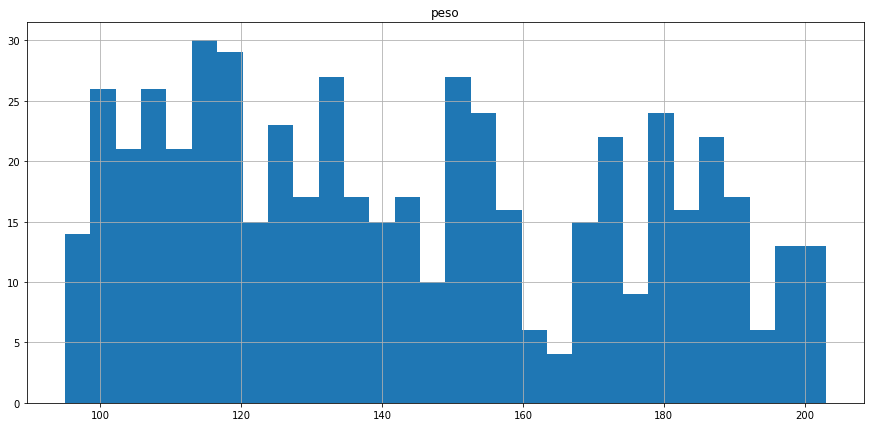

In [150]:
#criando histograma para peso com bins - > lettra C
clientes.hist(column='peso', figsize=(15,7), bins=30)
plt.show()

Figura A - letra c

In [151]:
#Qual o valor do WCSS para o terceiro cluster? (utilize random_state=0) 

#Qual o valor do WCSS para o número de clusters = 4? (utilize random_state=0)

# calcular a variação total de clusters
def calcular_wcss(dados_cliente):
  wcss=[]
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k, random_state=0)
    kmeans.fit(X=dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [152]:
# variaveis que serão utilizados no agrupamento
dados_cliente = base_completa[['peso', 'colesterol']]
dados_cliente.head()

,peso,colesterol
0,102.0,111
17,115.0,135
39,115.0,136
64,130.0,158
83,198.0,227


In [153]:
#visualizando os dados obtidos no wcss
for i in range (len(wcss_clientes)):
  print(f'O cluster {i} possui o valor de wcss de: {wcss_clientes[i]}')

O cluster 0 possui o valor de wcss de: 1248240.668674699
O cluster 1 possui o valor de wcss de: 298932.7377352369
O cluster 2 possui o valor de wcss de: 127847.6195681955
O cluster 3 possui o valor de wcss de: 73826.3353951529
O cluster 4 possui o valor de wcss de: 49079.083808467956
O cluster 5 possui o valor de wcss de: 34064.500021008374
O cluster 6 possui o valor de wcss de: 25122.257107188125
O cluster 7 possui o valor de wcss de: 20441.83167815419
O cluster 8 possui o valor de wcss de: 15949.21276427297
O cluster 9 possui o valor de wcss de: 13390.707825076835


In [154]:
#Qual o valor do WCSS para o terceiro cluster? (utilize random_state-0) 
#Terceiro cluster = 127847

In [155]:
#Qual o valor do WCSS para o número de clusters = 4? (utilize random_state=0) 
#49003.06

In [156]:
#Qual o valor do centroide para o grupo de alto risco? 184.32394366, 218.98591549
#Leve em consideração as variáveis na seguinte sequência: peso e colesterol. 
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[184.32394366, 218.98591549],
       [127.57024793, 154.20661157],
       [106.90697674, 119.57364341],
       [152.32075472, 186.03773585]])

In [157]:
#Qual a média de idades para o cluster de Risco baixo? 43,13 
cluster_clientes.groupby('nome_cluster')['idade'].mean()

nome_cluster
Moderado Baixo    42.347107
Moderado alto     42.716981
Risco Alto        43.204225
Risco Baixo       43.139535
Name: idade, dtype: float64

In [158]:
#Qual o valor mínimo do colesterol coletado para o grupo de alto Risco? 204
cluster_clientes.groupby('nome_cluster')['colesterol'].min()

nome_cluster
Moderado Baixo    138
Moderado alto     168
Risco Alto        204
Risco Baixo       102
Name: colesterol, dtype: int64

In [159]:
#Qual o peso máximo presente no cluster de alto risco? 203
cluster_clientes.groupby('nome_cluster')['peso'].max()

nome_cluster
Moderado Baixo    142.0
Moderado alto     169.0
Risco Alto        203.0
Risco Baixo       118.0
Name: peso, dtype: float64

In [160]:
# Qual o estado com maior número de pessoas que estão no grupo de alto risco? Rio Grande do Sul
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Moderado Baixo,121,25,Sergipe,9
Moderado alto,106,25,Pernambuco,7
Risco Alto,142,25,Rio Grande do Sul,10
Risco Baixo,129,25,Amazonas,10


In [161]:
# verifica os valores na base de dados de alto risco no estado do "Rio Grande do Sul"
cluster_clientes.query('nome_cluster == "Risco Alto" & estado == "Rio Grande do Sul"')

,cod_cliente,peso,colesterol,genero,id_estado,estado,sigla_estado,pais,idade,cluster,nome_cluster
330,69,187.0,221,Feminino,21,Rio Grande do Sul,RS,Brasil,35,0,Risco Alto
332,106,179.0,216,Masculino,21,Rio Grande do Sul,RS,Brasil,56,0,Risco Alto
337,261,171.0,205,Masculino,21,Rio Grande do Sul,RS,Brasil,34,0,Risco Alto
340,313,169.0,204,Masculino,21,Rio Grande do Sul,RS,Brasil,33,0,Risco Alto
341,335,182.0,222,Masculino,21,Rio Grande do Sul,RS,Brasil,68,0,Risco Alto
342,373,194.0,224,Feminino,21,Rio Grande do Sul,RS,Brasil,38,0,Risco Alto
343,374,177.0,214,Masculino,21,Rio Grande do Sul,RS,Brasil,18,0,Risco Alto
344,376,172.0,205,Masculino,21,Rio Grande do Sul,RS,Brasil,50,0,Risco Alto
345,403,175.0,215,Feminino,21,Rio Grande do Sul,RS,Brasil,45,0,Risco Alto
346,409,180.0,219,Masculino,21,Rio Grande do Sul,RS,Brasil,19,0,Risco Alto


In [162]:
#Qual a média dos pesos para o grupo de risco moderado alto? 152,32
cluster_clientes.groupby('nome_cluster')['peso'].mean()

nome_cluster
Moderado Baixo    127.570248
Moderado alto     152.320755
Risco Alto        184.323944
Risco Baixo       106.906977
Name: peso, dtype: float64

In [163]:
# Agrupar por nome e genero e verificar os dados de colesterol dessas pessoas
cluster_clientes.groupby(['nome_cluster', 'genero'])['colesterol'].describe()

count        mean        std    min     25%    50%  \
nome_cluster   genero                                                          
Moderado Baixo Feminino    63.0  156.571429   9.596226  138.0  149.00  156.0   
               Masculino   58.0  151.637931   9.389614  138.0  143.25  151.5   
Moderado alto  Feminino    59.0  186.152542  10.182496  168.0  176.00  189.0   
               Masculino   47.0  185.893617   9.311596  172.0  178.00  184.0   
Risco Alto     Feminino    60.0  220.650000   6.456701  204.0  216.75  221.0   
               Masculino   82.0  217.768293   8.939162  204.0  211.00  219.0   
Risco Baixo    Feminino    58.0  122.448276  10.372319  102.0  113.00  124.5   
               Masculino   71.0  117.225352   9.677953  102.0  109.00  115.0   

                            75%    max  
nome_cluster   genero                   
Moderado Baixo Feminino   166.0  171.0  
               Masculino  158.0  168.0  
Moderado alto  Feminino   194.5  201.0  
               Masculino  192.5  203.0  
Risco Alto     Feminino   225.0  235.0  
               Masculino  225.0  235.0  
Risco Baixo    Feminino   130.0  138.0  
               Masculino  126.0  136.0

Conclusões com base no colesterol nos dados dos grupos em relação a genero masculino e feminino: 

* O grupo de alto risco possui média maior de colesterol para o gênero feminino em comparação ao gênero masculino.

* A quantidade maior de pessoas estão no grupo de Risco Baixo do gênero masculino

* A quantidade menor de pessoas está no grupo Moderado Alto do gênero feminino

* O desvio padrão de todos os grupos de gênero feminino são maiores que o gênero masculino. 